# Laptop Price Prediction

### Importing libraries and data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [3]:
df  = pd.read_csv('laptop_details.csv')
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


### Feature Extraction

> Here we can use 'Product' and 'Feature' for information of the product 
> We dont want Brand name and rating of the product,rating is based on the brand name we are here working for elomusk.

In [4]:
def feature_extract(feature):
    # RAM size
    ram = re.search(r'\b(\d+)\s*[GB|gb]', feature)
    if ram:
        ram = ram.group(1)
    else:
        ram = None

    # Operating system
    os = re.search(r'Windows\s*\d+|Windows\s*[V|v]ista|[L|l]inux|[M|m]ac\s*[O|o]S', feature)
    if os:
        os = os.group()
    else:
        os = None

    # Graphics card
    graphics_regex = r'(\d+)\s+GB\s+Graphics'
    graphics = ''.join(re.findall(graphics_regex, feature))
    


    return pd.Series({'ram': ram, 'os': os, 'graphics': graphics})

In [5]:
new_df  =  df['Product'].apply(feature_extract)

df = df.join(new_df)

In [6]:
#exxtracting processor information from feature
regex = r'\b(?:AMD|Intel|M1|M2|Qualcomm)[\s\w]+Processor'
fun = lambda x: re.findall(regex, x)
df['processor'] = df['Feature'].apply(fun)

#Extracting Storage info
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['memory'] = df['Feature'].apply(lambda x : re.findall(regex, x))

#Extracting display size
df['display'] = df['Feature'].apply(lambda x : re.findall(r'\d+(?:\.\d+)? inch',x))

In [7]:
df.processor = df.processor.apply(lambda x: ''.join(x))
df.memory = df.memory.apply(lambda x: ''.join(x))
df.display = df.display.apply(lambda x: ''.join(x))

In [8]:
df['MRP'] = df['MRP'].apply(lambda x : int(x[1:].replace(',', '')))

In [9]:
df.head()

,Product,Rating,MRP,Feature,ram,os,graphics,processor,memory,display
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,8,Windows 11,,Intel Core i3 Processor,256 GB SSD,14 inch
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,8,Windows 11,,Intel Core i3 Processor,512 GB SSD,15.6 inch
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,8,Windows 11,,Intel Core i3 Processor,512 GB SSD,15.6 inch
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,8,Windows 10,4,AMD Ryzen 5 Hexa Core Processor,512 GB SSD,15.6 inch
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,8,Windows 11,4,Intel Core i5 Processor,512 GB SSD,15.6 inch


### Data Cleaning

In [10]:
df.drop(columns = ['Rating'],inplace = True)
#lets drop feature later

In [11]:
df['os'].value_counts()

Windows 11    534
Windows 10    126
Mac OS         19
Windows 1       2
Name: os, dtype: int64

In [12]:
df[df['os']=='Windows 1']
# they are actually windows 11.

,Product,MRP,Feature,ram,os,graphics,processor,memory,display
565,ASUS ROG Zephyrus Duo 16 (2022) with 90Whr Bat...,249990,AMD Ryzen 7 Octa Core Processor32 GB DDR5 RAM6...,32,Windows 1,,AMD Ryzen 7 Octa Core Processor,2 TB SSD,
577,ASUS ROG Zephyrus Duo 16 (2022) with 90Whr Bat...,249990,AMD Ryzen 7 Octa Core Processor32 GB DDR5 RAM6...,32,Windows 1,,AMD Ryzen 7 Octa Core Processor,2 TB SSD,


In [13]:
df.loc[df['os'] == 'Windows 1', 'os'] = 'Windows 11'

In [14]:
df['os'].fillna('0',inplace = True)

In [15]:
df['os'].value_counts()

Windows 11    536
Windows 10    126
0              39
Mac OS         19
Name: os, dtype: int64

In [16]:
df[df['memory']=='']
# they are just 32,64 and 128 gb's 64 gb is high in number so replace with 64gb.

,Product,MRP,Feature,ram,os,graphics,processor,memory,display
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,4,Windows 11,,Qualcomm Snapdragon 7c Gen 2 Processor,,
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,4,0,,Intel Celeron Dual Core Processor,,
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,4,0,,Intel Celeron Dual Core Processor,,
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,14990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,4,0,,Intel Celeron Dual Core Processor,,11.6 inch
509,ASUS Chromebook Flip Touch Celeron Dual Core -...,24390,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,4,0,,Intel Celeron Dual Core Processor,,15.6 inch
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,21990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,4,Windows 11,,Intel Celeron Dual Core Processor,,
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,19990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,4,Windows 11,,Intel Celeron Dual Core Processor,,
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual ...,28490,Intel Celeron Dual Core Processor4 GB LPDDR4X ...,4,0,,Intel Celeron Dual Core Processor,,11.6 inch
695,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,25990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,4,0,,Intel Celeron Dual Core Processor,,14 inch
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,4,0,,Intel Celeron Dual Core Processor,,11.6 inch


In [17]:
df.loc[df['memory'] == '', 'memory'] = '64 gb'

In [18]:
df['memory'] = df['memory'].str.split().str[0]

In [19]:
df['memory'].value_counts()

512    375
1      221
256     99
64      10
128      8
2        7
Name: memory, dtype: int64

In [20]:
df['ram'].value_counts()

8     402
16    263
4      37
32     17
5       1
Name: ram, dtype: int64

In [21]:
#correcting the mistake
df.loc[df['ram'] == '5','ram'] = '8'

In [22]:
df['processor'].value_counts()

Intel Core i5 Processor                   151
Intel Core i3 Processor                   129
AMD Ryzen 9 Octa Core Processor            87
AMD Ryzen 7 Octa Core Processor            79
Intel Core i7 Processor                    50
AMD Ryzen 5 Hexa Core Processor            48
AMD Ryzen 3 Dual Core Processor            42
AMD Ryzen 5 Quad Core Processor            37
                                           25
Intel Celeron Dual Core Processor          20
Intel Core i9 Processor                    10
M1 Processor                                7
M1 Pro Processor                            6
M2 Processor                                5
AMD Ryzen 3 Quad Core Processor             4
Intel Pentium Quad Core Processor           3
Intel Celeron Quad Core Processor           3
Intel Pentium Silver Processor              2
Intel Evo Core i5 Processor                 2
AMD Athlon Dual Core Processor              2
Intel OptaneIntel Core i3 Processor         2
Qualcomm Snapdragon 7c Gen 2 Proce

In [23]:
#For these 25 empty processors we are not able to extract info 
def fun(x):
    if 'i3' in x:
        return 'Intel Core i3 Processor'
    elif 'i5' in x:
        return 'Intel Core i5 Processor'
    elif 'i7' in x:
        return 'Intel Core i7 Processor'
    elif 'i9' in x:
        return 'Intel Core i9 Processor'
    elif 'Ryzen 3' in x:
        return 'AMD Ryzen 3 Dual Core Processor'
    elif 'Ryzen 5' in x:
        return 'AMD Ryzen 5 Quad Core Processor'
    elif 'Ryzen 7' in x:
        return 'AMD Ryzen 7 Octa Core Processor'
    else:
        return 'Intel Core i3 Processor'

df.loc[df['processor']=='','Product'] = df.loc[df['processor']=='','Product'].apply(fun)

In [24]:
df[df['processor']=='8']  #not valid row

,Product,MRP,Feature,ram,os,graphics,processor,memory,display


In [25]:
df.drop(index = 448,inplace = True)

In [26]:
#Now display
df['display'].value_counts()

15.6 inch                 352
                          210
14 inch                   100
13.3 inch                   9
15.6 inch15.6 inch          7
16 inch                     6
16.1 inch                   5
17.3 inch                   5
16.2 inch                   5
14.1 inch                   4
11.6 inch                   4
15 inch                     4
14.2 inch                   2
14 inch14 inch              2
13 inch                     1
13.5 inch                   1
16.6 inch                   1
206015.6 inch15.6 inch      1
Name: display, dtype: int64

In [27]:
#display is cannot be known in these examples.
df.loc[df['display'] == '']['Feature']

11     AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...
13     AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
14     Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
17     Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...
23     AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...
                             ...                        
705    AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAM6...
706    AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...
709    AMD Ryzen 9 Octa Core Processor16 GB LPDDR5 RA...
710    AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...
713    Intel Core i5 Processor (12th Gen)16 GB DDR5 R...
Name: Feature, Length: 210, dtype: object

### display is having 210 examples null values because the values are not provided , we cannot eve drop them that is a huge number, And also display is in range of 13 to 16 inch approx so its better lets drop it

In [28]:
df.drop(['display'],inplace = True,axis = 1)

In [29]:
df['graphics'].value_counts()

      531
4     121
8      32
6      24
2       8
16      3
Name: graphics, dtype: int64

> Graphics is also having 531 nan values which is more than half of our data but the graphic card can make a significant difference in the price of a laptop. Laptops with dedicated graphics cards are generally more expensive than those without, as they offer better performance and are ideal for gaming. So we should labelencode the graphic card.

In [30]:
df.loc[df['graphics']== '','graphics'] = '0'

In [31]:
df['graphics'].value_counts()

0     531
4     121
8      32
6      24
2       8
16      3
Name: graphics, dtype: int64

In [32]:
df['graphics'] = df['graphics'].astype('int')

In [33]:
df.columns

Index(['Product', 'MRP', 'Feature', 'ram', 'os', 'graphics', 'processor',
       'memory'],
      dtype='object')

## Data Analysis

In [34]:
df['MRP'] = df['MRP'].astype('int')

In [35]:
df['MRP'].describe()

count       719.000000
mean      81633.107093
std       61591.451966
min       14990.000000
25%       38994.500000
50%       59990.000000
75%       95490.000000
max      434830.000000
Name: MRP, dtype: float64

<AxesSubplot:xlabel='MRP', ylabel='Count'>

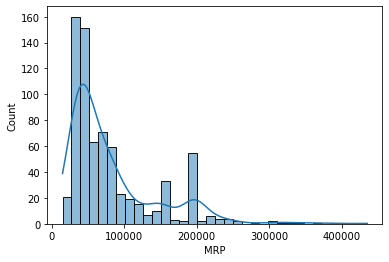

In [36]:
sns.histplot(x = 'MRP',data = df,kde = True)

<AxesSubplot:xlabel='MRP'>

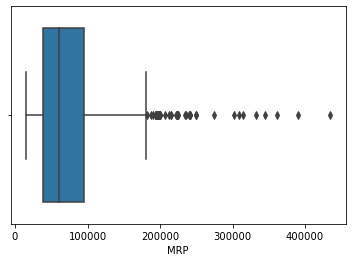

In [37]:
sns.boxplot(x = 'MRP',data = df)

In [38]:
df.loc[df['MRP']>200000,'MRP'] = df[df['MRP']>200000]['MRP'].mean()

<AxesSubplot:xlabel='MRP'>

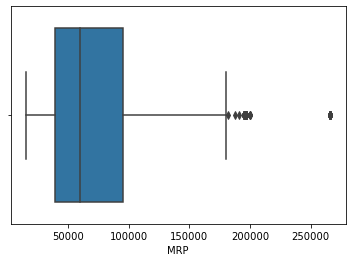

In [39]:
sns.boxplot(x = 'MRP',data = df)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Windows 11'),
  Text(1, 0, 'Windows 10'),
  Text(2, 0, 'Mac OS'),
  Text(3, 0, '0')])

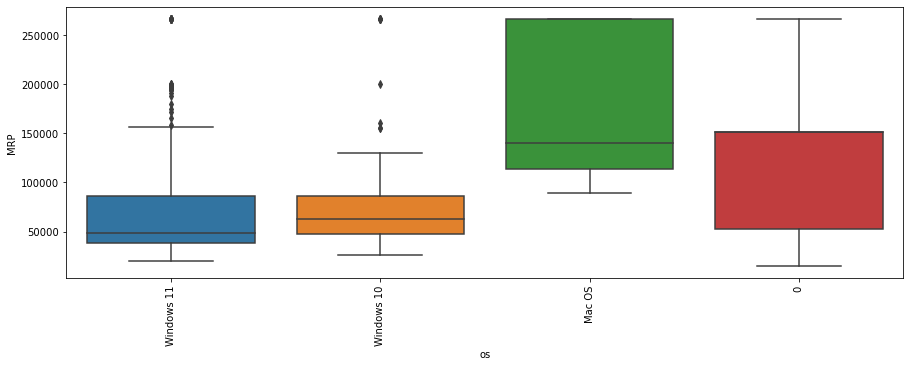

In [40]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'os',y = 'MRP',data = df)
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '256'),
  Text(1, 0, '512'),
  Text(2, 0, '1'),
  Text(3, 0, '64'),
  Text(4, 0, '128'),
  Text(5, 0, '2')])

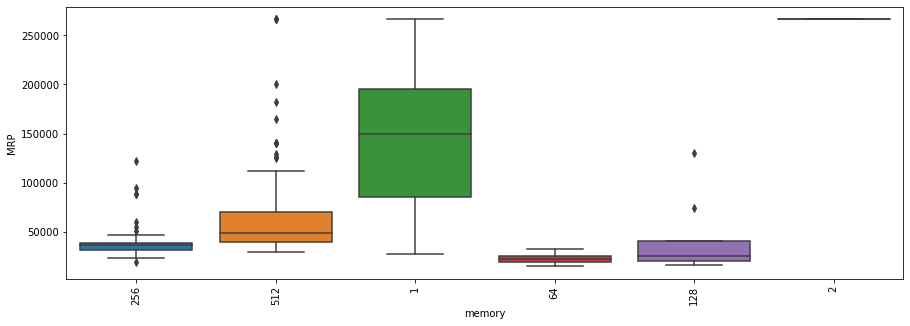

In [41]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'memory',y = 'MRP',data = df)
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3]),
 [Text(0, 0, '8'), Text(1, 0, '16'), Text(2, 0, '4'), Text(3, 0, '32')])

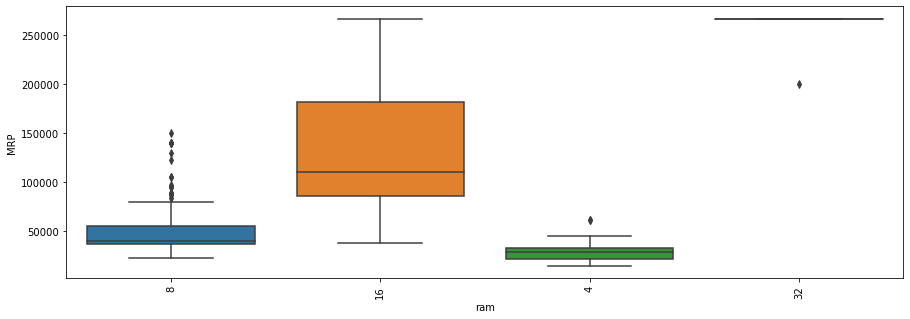

In [42]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'ram',y = 'MRP',data = df)
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '6'),
  Text(4, 0, '8'),
  Text(5, 0, '16')])

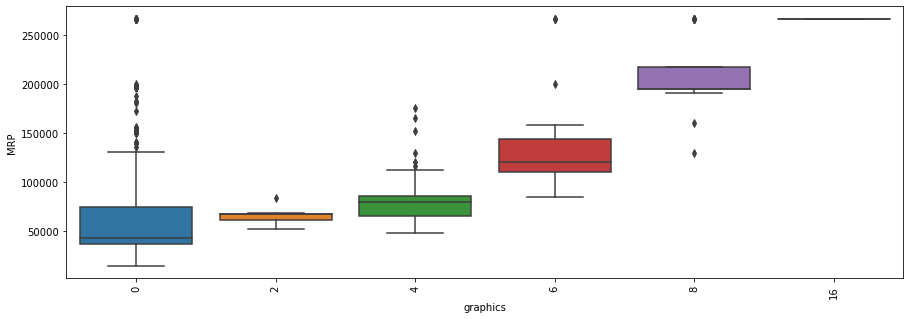

In [43]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'graphics',y = 'MRP',data = df)
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Intel Core i3 Processor'),
  Text(1, 0, 'AMD Ryzen 5 Hexa Core Processor'),
  Text(2, 0, 'Intel Core i5 Processor'),
  Text(3, 0, 'Intel OptaneIntel Core i3 Processor'),
  Text(4, 0, ''),
  Text(5, 0, 'AMD Ryzen 7 Quad Core Processor'),
  Text(6, 0, 'AMD Ryzen 5 Quad Core Processor'),
  Text(7, 0, 'AMD Ryzen 9 Octa Core Processor'),
  Text(8, 0, 'AMD Ryzen 7 Octa Core Processor'),
  Text(9, 0, 'M1 Processor'),
  Text(10, 0, 'Intel Celeron Dual Core Processor'),
  Text(11, 0, 'AMD Ryzen 3 Dual Core Processor'),
  Text(12, 0, 'AMD Athlon Dual Core Processor'),
  Text(13, 0, 'Intel Evo Core i5 Processor'),
  Text(14, 0, 'AMD Ryzen 3 Quad Core Processor'),
  Text(15, 0, 'M2 Processor'),
  Text(16, 0, 'Intel Celeron Quad Core Processor'),
  Text(17, 0, 'Intel Core i7 Processor'),
  Text(18, 0, 'M1 Pro Processor'),
  Text(19, 0, 'Qualcomm Snapdragon 7c G

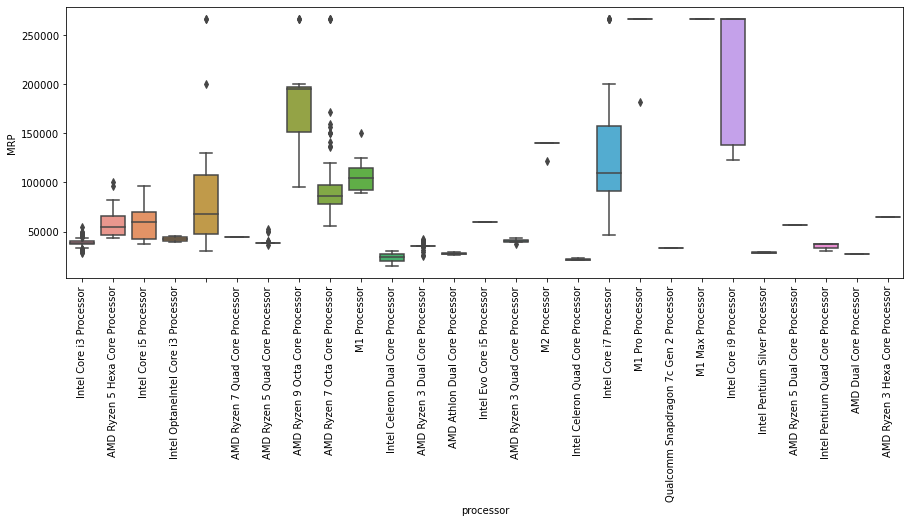

In [44]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'processor',y = 'MRP',data = df)
plt.xticks(rotation = 'vertical')

### Preprocessing

In [45]:
df.groupby(['processor'])['MRP'].median().sort_values()

processor
Intel Celeron Quad Core Processor          20990.0
Intel Celeron Dual Core Processor          23740.0
AMD Dual Core Processor                    27490.0
AMD Athlon Dual Core Processor             27690.0
Intel Pentium Silver Processor             28740.0
Qualcomm Snapdragon 7c Gen 2 Processor     32990.0
AMD Ryzen 3 Dual Core Processor            35590.0
Intel Pentium Quad Core Processor          36990.0
Intel Core i3 Processor                    38216.0
AMD Ryzen 5 Quad Core Processor            38705.0
AMD Ryzen 3 Quad Core Processor            40799.0
Intel OptaneIntel Core i3 Processor        42445.0
AMD Ryzen 7 Quad Core Processor            44990.0
AMD Ryzen 5 Hexa Core Processor            54645.0
AMD Ryzen 5 Dual Core Processor            56990.0
Intel Evo Core i5 Processor                59990.0
Intel Core i5 Processor                    60260.0
AMD Ryzen 3 Hexa Core Processor            64590.0
                                           67990.0
AMD Ryzen 7 Octa Core

In [46]:
df.groupby(['memory'])['MRP'].median().sort_values()

memory
64      22740.0
128     25485.0
256     36990.0
512     49169.0
1      149990.0
2      266294.0
Name: MRP, dtype: float64

In [47]:
df.groupby(['ram'])['MRP'].median().sort_values()

ram
4      28490.0
8      39990.0
16    109990.0
32    266294.0
Name: MRP, dtype: float64

In [48]:
df.groupby(['os'])['MRP'].median().sort_values()

os
Windows 11     48077.0
Windows 10     63040.0
Mac OS        139990.0
0             150990.0
Name: MRP, dtype: float64

In [49]:
df.groupby(['graphics'])['MRP'].median().sort_values()

graphics
0      43090.0
2      67107.0
4      79990.0
6     120490.0
8     194990.0
16    266294.0
Name: MRP, dtype: float64

 ###  So our categorical features will be label_encoded as above

In [50]:
df.drop(['Product','Feature'],axis = 1, inplace = True)

In [51]:
encode_dict  = {}
def target_encoding( feature):
    x = df.groupby(feature)['MRP'].median().sort_values().index
    encode_dict[feature] = {key:index for index,key in enumerate(x)}
    df[feature] = df[feature].map(encode_dict[feature])


In [52]:
cat_features  =  ['ram', 'os', 'graphics', 'processor', 'memory']
for i in cat_features:
    target_encoding(i)

## Model_building

In [53]:
y = df['MRP']
X = df[cat_features]

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

### Random_forest regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest")
print("MSE:", mse)
print("R2:", r2)


Random Forest
MSE: 260840273.74939266
R2: 0.9292817677294926


### Gradient boosting regressor

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting")
print("MSE:", mse)
print("R2:", r2)


Gradient Boosting
MSE: 251233181.23044637
R2: 0.9318864138235686


### Xgboost

In [57]:
import xgboost as xgb

# Train the model
xgbr = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost")
print("MSE:", mse)
print("R2:", r2)


XGBoost
MSE: 255455460.49219158
R2: 0.9307416821406465


### Random forest is giving good accuracy.

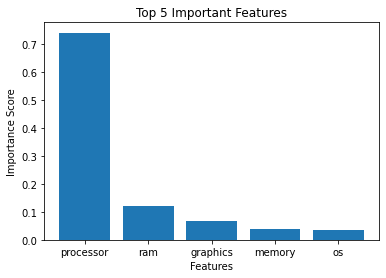

In [58]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X.columns[indices][:5]
plt.bar(top_features, importances[indices][:5])
plt.title('Top 5 Important Features')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

## Processor is Highly correlated with the price of the laptop, I recommend that the processor and RAM are important features to keep in mind while building laptops.

### Saving model

In [59]:
import pickle
with open('rfmodel.pkl', 'wb') as file:
    pickle.dump(rf, file)
with open('encode_dict','wb') as file:
    pickle.dump(encode_dict,file)